In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and read in csv file for graduation rates
csv_path = "GRAD_RATE_AND_OUTCOMES_2019.csv"
grad_rates_df = pd.read_csv(csv_path)
grad_rates_df.head()

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,report_school_year,aggregation_index,aggregation_type,aggregation_code,aggregation_name,entity_inactive_date,lea_beds,lea_name,nrc_code,nrc_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,68331,33%,2756,1%,5417,3%,1374,1%,18866,9%
1,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,36981,37%,909,1%,2006,2%,541,1%,7442,7%
2,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,31350,29%,1847,2%,3411,3%,833,1%,11424,11%
3,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,228,18%,26,2%,49,4%,17,1%,209,17%
4,2018-19,0,Statewide,0,All Districts and Charters,NaN,NaN,NaN,NaN,NaN,...,4329,12%,633,2%,1567,4%,342,1%,4851,13%


In [3]:
# Drop any unneccessary columns to get reduced DataFrame
reduced_grad_rates = grad_rates_df[["county_name", "enroll_cnt", "grad_cnt", "grad_pct", 
                                    "still_enr_cnt", "still_enr_pct", "dropout_cnt", "dropout_pct"]]

reduced_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
0,NaN,206486,177940,86%,5417,3%,18866,9%
1,NaN,100118,89170,89%,2006,2%,7442,7%
2,NaN,106368,88770,83%,3411,3%,11424,11%
3,NaN,1255,952,76%,49,4%,209,17%
4,NaN,37080,29662,80%,1567,4%,4851,13%
...,...,...,...,...,...,...,...,...
224133,YATES,-,-,-,-,-,-,-
224134,YATES,-,-,-,-,-,-,-
224135,YATES,-,-,-,-,-,-,-
224136,YATES,-,-,-,-,-,-,-


In [4]:
# Get data for NYC boroughs 
# (Bronx = BRONX, Brooklyn = KINGS, Manhattan = NEW YORK, Queens = QUEENS, Staten Island = RICHMOND)
nyc_grad_rates = reduced_grad_rates.query('county_name == "BRONX" | county_name == "KINGS" | county_name =="NEW YORK"  | county_name == "QUEENS" | county_name == "RICHMOND"')
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183699,RICHMOND,-,-,-,-,-,-,-
183700,RICHMOND,-,-,-,-,-,-,-
183701,RICHMOND,-,-,-,-,-,-,-
183702,RICHMOND,-,-,-,-,-,-,-


In [5]:
# Set all null data (fields with hyphens) to NaN
nyc_grad_rates = nyc_grad_rates.replace('-',np.NaN)
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183699,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183700,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183701,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183702,RICHMOND,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Drop null data
nyc_grad_rates = nyc_grad_rates.dropna(how="any")
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
4704,NEW YORK,16392,13275,81%,776,5%,2018,12%
4705,NEW YORK,8735,7433,85%,303,3%,871,10%
4706,NEW YORK,7657,5842,76%,473,6%,1147,15%
4707,NEW YORK,101,66,65%,7,7%,23,23%
4708,NEW YORK,4248,3364,79%,230,5%,539,13%
...,...,...,...,...,...,...,...,...
183692,RICHMOND,29,22,76%,1,3%,6,21%
183694,RICHMOND,36,25,69%,5,14%,5,14%
183695,RICHMOND,22,16,73%,3,14%,3,14%
183697,RICHMOND,24,14,58%,6,25%,3,13%


In [7]:
# Converting percentage columns to floats

nyc_grad_rates["grad_pct"] = nyc_grad_rates["grad_pct"].replace(
    '%', '', regex=True).astype('float')/100
nyc_grad_rates["still_enr_pct"] = nyc_grad_rates["still_enr_pct"].replace(
    '%', '', regex=True).astype('float')/100
nyc_grad_rates["dropout_pct"] = nyc_grad_rates["dropout_pct"].replace(
    '%', '', regex=True).astype('float')/100

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [8]:
# Convert enrollment count and grad count to floats
nyc_grad_rates["enroll_cnt"] = nyc_grad_rates["enroll_cnt"].astype('float')
nyc_grad_rates["grad_cnt"] = nyc_grad_rates["grad_cnt"].astype('float')

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# Resetting the index
nyc_grad_rates = nyc_grad_rates.reset_index(drop=True)
nyc_grad_rates

,county_name,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
0,NEW YORK,16392.0,13275.0,0.81,776,0.05,2018,0.12
1,NEW YORK,8735.0,7433.0,0.85,303,0.03,871,0.10
2,NEW YORK,7657.0,5842.0,0.76,473,0.06,1147,0.15
3,NEW YORK,101.0,66.0,0.65,7,0.07,23,0.23
4,NEW YORK,4248.0,3364.0,0.79,230,0.05,539,0.13
...,...,...,...,...,...,...,...,...
40273,RICHMOND,29.0,22.0,0.76,1,0.03,6,0.21
40274,RICHMOND,36.0,25.0,0.69,5,0.14,5,0.14
40275,RICHMOND,22.0,16.0,0.73,3,0.14,3,0.14
40276,RICHMOND,24.0,14.0,0.58,6,0.25,3,0.13


In [10]:
# Rename "county_name" to "Borough" and edit county names to borough names to match lottery DataFrame for later
nyc_grad_rates = nyc_grad_rates.rename(columns={"county_name": "Borough"})
nyc_grad_rates = nyc_grad_rates.replace({"BRONX": "Bronx", "KINGS": "Brooklyn", "NEW YORK": "Manhattan", "QUEENS": "Queens", "RICHMOND": "Staten Island"})
nyc_grad_rates

,Borough,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct
0,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12
1,Manhattan,8735.0,7433.0,0.85,303,0.03,871,0.10
2,Manhattan,7657.0,5842.0,0.76,473,0.06,1147,0.15
3,Manhattan,101.0,66.0,0.65,7,0.07,23,0.23
4,Manhattan,4248.0,3364.0,0.79,230,0.05,539,0.13
...,...,...,...,...,...,...,...,...
40273,Staten Island,29.0,22.0,0.76,1,0.03,6,0.21
40274,Staten Island,36.0,25.0,0.69,5,0.14,5,0.14
40275,Staten Island,22.0,16.0,0.73,3,0.14,3,0.14
40276,Staten Island,24.0,14.0,0.58,6,0.25,3,0.13


In [11]:
# Exporting DataFrame as CSV file
nyc_grad_rates.to_csv("nyc_grad_rates.csv")

In [12]:
# Average grad rate per borough
nyc_grad_rates.groupby(["Borough"])["grad_pct"].mean()

Borough
Bronx            0.719870
Brooklyn         0.757800
Manhattan        0.786880
Queens           0.805884
Staten Island    0.794940
Name: grad_pct, dtype: float64

In [13]:
# Sum of enrollment count by borough
nyc_grad_rates.groupby(["Borough"])["enroll_cnt"].sum()

Borough
Bronx            1749920.0
Brooklyn         2587976.0
Manhattan        1919060.0
Queens           2405378.0
Staten Island     564238.0
Name: enroll_cnt, dtype: float64

In [14]:
# Sum of graduation count by borough
nyc_grad_rates.groupby(["Borough"])["grad_cnt"].sum()

Borough
Bronx            1280598.0
Brooklyn         2070061.0
Manhattan        1529914.0
Queens           1978962.0
Staten Island     473821.0
Name: grad_cnt, dtype: float64

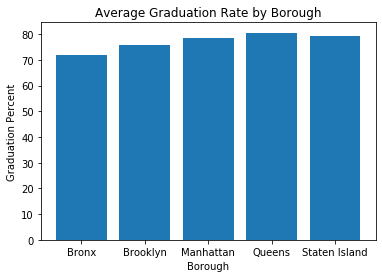

In [15]:
boroughs = ["Bronx", "Brooklyn", "Manhattan", "Queens", "Staten Island"]
avg_grad_rate = nyc_grad_rates.groupby(["Borough"])["grad_pct"].mean()*100

plt.bar(boroughs, avg_grad_rate)
plt.title("Average Graduation Rate by Borough")
plt.xlabel("Borough")
plt.ylabel("Graduation Percent")
plt.savefig("Average Graduation Rate by Borough")
plt.show()

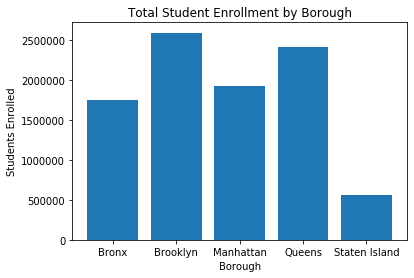

In [16]:
total_enroll = nyc_grad_rates.groupby(["Borough"])["enroll_cnt"].sum()

plt.bar(boroughs, total_enroll)
plt.title("Total Student Enrollment by Borough")
plt.xlabel("Borough")
plt.ylabel("Students Enrolled")
plt.savefig("Total Studen Enrollment by Borough")
plt.show()

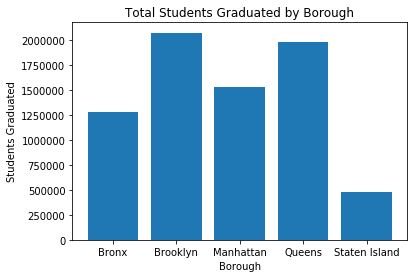

In [17]:
total_grad = nyc_grad_rates.groupby(["Borough"])["grad_cnt"].sum()

plt.bar(boroughs, total_grad)
plt.title("Total Students Graduated by Borough")
plt.xlabel("Borough")
plt.ylabel("Students Graduated")
plt.savefig("Total Students Graduated by Borough")
plt.show()

In [18]:
# Load and read in csv file for lottery tickets
lott_retail_csv = "Resources/RetailersByPop.csv"
lott_df = pd.read_csv(lott_retail_csv)
lott_df

,City,Borough,Neighborhood,Zip,Lotto Retailers,Population,Retailer per 100k
0,New York,Bronx,Central Bronx,10453,56.0,79606.0,70.346456
1,New York,Bronx,Central Bronx,10457,65.0,74554.0,87.185128
2,New York,Bronx,Central Bronx,10460,42.0,59505.0,70.582304
3,New York,Bronx,Bronx Park and Fordham,10458,55.0,83960.0,65.507384
4,New York,Bronx,Bronx Park and Fordham,10467,55.0,103732.0,53.021247
...,...,...,...,...,...,...,...
173,New York,Staten Island,South Shore,10312,31.0,61741.0,50.209747
174,New York,Staten Island,Stapleton and St. George,10301,35.0,38733.0,90.362223
175,New York,Staten Island,Stapleton and St. George,10304,28.0,41064.0,68.186246
176,New York,Staten Island,Stapleton and St. George,10305,40.0,42298.0,94.567119


In [19]:
# Merge graduation rates and lottery DataFrames
merge_df = pd.merge(nyc_grad_rates, lott_df, on="Borough", how="outer")
merge_df

,Borough,enroll_cnt,grad_cnt,grad_pct,still_enr_cnt,still_enr_pct,dropout_cnt,dropout_pct,City,Neighborhood,Zip,Lotto Retailers,Population,Retailer per 100k
0,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12,New York,Central Harlem,10026,14.0,39363.0,35.566395
1,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12,New York,Central Harlem,10027,24.0,64548.0,37.181632
2,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12,New York,Central Harlem,10030,16.0,29882.0,53.543939
3,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12,New York,Central Harlem,10037,18.0,21139.0,85.150669
4,Manhattan,16392.0,13275.0,0.81,776,0.05,2018,0.12,New York,Central Harlem,10039,18.0,27726.0,64.921013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568069,Staten Island,34.0,27.0,0.79,2,0.06,5,0.15,New York,South Shore,10312,31.0,61741.0,50.209747
1568070,Staten Island,34.0,27.0,0.79,2,0.06,5,0.15,New York,Stapleton and St. George,10301,35.0,38733.0,90.362223
1568071,Staten Island,34.0,27.0,0.79,2,0.06,5,0.15,New York,Stapleton and St. George,10304,28.0,41064.0,68.186246
1568072,Staten Island,34.0,27.0,0.79,2,0.06,5,0.15,New York,Stapleton and St. George,10305,40.0,42298.0,94.567119


In [20]:
grouped_lott_ret = merge_df.groupby(["Borough"])["Lotto Retailers"].sum()
grouped_lott_ret

Borough
Bronx            10576338.0
Brooklyn         20521140.0
Manhattan        10641192.0
Queens           12081872.0
Staten Island      409028.0
Name: Lotto Retailers, dtype: float64

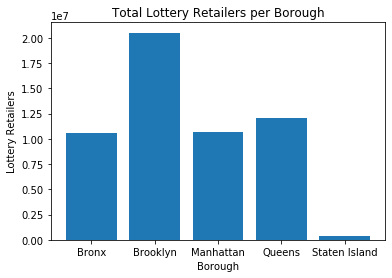

In [21]:
plt.bar(boroughs, grouped_lott_ret)
plt.title("Total Lottery Retailers per Borough")
plt.xlabel("Borough")
plt.ylabel("Lottery Retailers")
plt.savefig("Total Lottery Retailers per Borough")
plt.show()

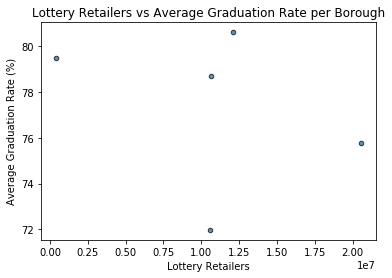

In [22]:
plt.scatter(grouped_lott_ret, avg_grad_rate, marker="o",s = 20, alpha = .75, edgecolors = "black")
plt.title("Lottery Retailers vs Average Graduation Rate per Borough")
plt.ylabel("Average Graduation Rate (%)")
plt.xlabel("Lottery Retailers")
plt.show()